# Introduction

On average, there are 1.88 vehicles per U.S. household. Owning a car is becoming more and more common worldwide. As a result, the second-handed car market is also favored by many citizens. There is a great variety of used cars with a different performance from different factories available in the market. Hence, it makes me wonder how is the price related to its performance, functioning, and manufacturer. To be more specific, I will discover how is the price of the used cars related to the odometer, drive, vehicle type, and colors.

The first important thing in data science is to form a business understanding of the problem. For example, who can be our potential clients asking us to analyze such datasets, what factors are related to our parameter of interest, and so on. After we have a decent business understanding, we move to the data understanding part. we will look at a few entries of the dataset which we are using and a summary statistics of the dataset to understand the variables' types. The next part is data preparation, we will start preparing our data for Exploratory Data Analysis (EDA) by checking the null entries or manipulating the structures (e.g. adding a new column) here. The coming most important part is EDA. We will apply many different plots to visualize the relationship between different variables, statistics tools such as hypothesis test to further clarify the relationship, and maybe machine learning methods such as linear regression to help identify the existence of a possible relationship. The final part is a short conclusion to discuss what we find, what are the limitations, and what can be further explored.

# Business Understanding

# Data Understanding&Preparation

In this section, I will take a glance at our data to form an idea of their values and types. In addition, I will prepare our data for the Exploratory Data Analysis by removing some irrelevant columns, handling the null values and some outliers.

The dataset "Used Cars Dataset" is obtained from Kaggle(https://www.kaggle.com/austinreese/craigslist-carstrucks-data), It is a dataset containing collections of used vehicles for sale on Craigslist. The dataset includes every used vehicle entry within the United States on Craigslist and is updated every few months. The dataset I am using is last updated in January 2020.

In [49]:
#read the file
import pandas as pd

car = pd.read_csv("/kaggle/input/craigslist-carstrucks-data/vehicles.csv")
car.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [52]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

### Variables Description


Unnamed: 0: useless column left in by mistake, nominal

id: ID of the used car, nominal

url: listing URL, nominal

region: craigslist region, nominal

region_url: region URL, nominal

price: price of the used car, ratio

year: entry year, interval

manufacturer: manufacturer of the car, nominal

model: model of the vehicle, nominal

condition: condition of the used cars(e.g. good,excellent...), nominal

cylinders: how many cylinders the cars have, nominal

odometer: how many odometers the used car have, ratio

title_status: title status of vehicle(e.g. clean...), nominal

transmission: transmission of the car, nominal

VIN: vehicle identification number, nominal

drive: drive type of the car, nominal

size: size of vehicle (full-size...), nominal

type: generic type of vehicle, nominal

paint_color: colors of the car, nominal

image_url: image URL, nominal

description: listed description of the vehicle, nominal

state: state of listing, nominal

lat: latitude of the listing vehicle, nominal

long: longtitude of the listing vehicle, nominal

posting_date: the date that car was posted, nominal

Since we are interested in how odometer, drive, vehicles type and colors relate to price, let's remove some other columns.

In [ ]:
car = car.drop(["Unnamed: 0","url","region","region_url","title_status","VIN","size","image_url","description","state","lat","long"],axis=1)

Let's check how many empty entries our data have

In [4]:
car.isnull().sum()

id                   0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
transmission      2442
drive           134188
type            112738
paint_color     140843
posting_date        28
dtype: int64

We want to compare the number of "nan" values to the size of that column.

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   price         458213 non-null  int64  
 2   year          457163 non-null  float64
 3   manufacturer  439993 non-null  object 
 4   model         453367 non-null  object 
 5   condition     265273 non-null  object 
 6   cylinders     287073 non-null  object 
 7   fuel          454976 non-null  object 
 8   odometer      402910 non-null  float64
 9   transmission  455771 non-null  object 
 10  drive         324025 non-null  object 
 11  type          345475 non-null  object 
 12  paint_color   317370 non-null  object 
 13  posting_date  458185 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 48.9+ MB


We have a lot of null values in the dataset. However, since we are interested in the relationship between odometer, drive, types, color and price, we will fill the na values in the original dataset by using "fillna" method containing at least one "nan" value of "manufacturer", "drive", "types" and "color". Since price does not contain null value, we don't need to modify it.

In [6]:
car['odometer'] = car['odometer'].fillna(method='ffill')
car['paint_color'] = car['paint_color'].fillna(method='ffill')
car['drive'] = car['drive'].fillna(method='ffill')
car['type'] = car['type'].fillna(method='ffill')

In [7]:
#check if we drop out all the rows containing na
car.isnull().sum()

id                   0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer             0
transmission      2442
drive                0
type                 0
paint_color          2
posting_date        28
dtype: int64

After we fill the na value, we need to check and handle the "extreme" of "price" since we are interested in predicting the price using variables in common. These used cars with extremely high prices might not be common and eventually won't get sold out. These outliers might influence the mean, standard deviation, and the plots by a lot. We will remove these data when focusing on our problem. In addition to "price", "odometer" is another numerical variable we want to handle the extremes and outliers

Before we filter our data, it looks like:

In [8]:
car.describe()

,id,price,year,odometer
count,4.582130e+05,4.582130e+05,457163.000000,4.582130e+05
mean,7.235233e+09,4.042093e+04,2010.746067,1.019036e+05
std,4.594362e+06,8.194599e+06,8.868136,3.028022e+06
min,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.231953e+09,4.900000e+03,2008.000000,4.127400e+04
50%,7.236409e+09,1.099500e+04,2013.000000,8.841900e+04
75%,7.239321e+09,2.149500e+04,2016.000000,1.350000e+05
max,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09


In [18]:
#subset the original car dataset by 
#extract data with price >1
#price < 99% quantile
#odometer < 99% quantile
car=car[(car["odometer"] < car["odometer"].quantile(.99)) & (car["price"]<car["price"].quantile(.99)) & (car.price > 1)]


After the filtering, the data looks like

In [9]:
car.describe()

,id,price,year,odometer
count,4.582130e+05,4.582130e+05,457163.000000,4.582130e+05
mean,7.235233e+09,4.042093e+04,2010.746067,1.019036e+05
std,4.594362e+06,8.194599e+06,8.868136,3.028022e+06
min,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.231953e+09,4.900000e+03,2008.000000,4.127400e+04
50%,7.236409e+09,1.099500e+04,2013.000000,8.841900e+04
75%,7.239321e+09,2.149500e+04,2016.000000,1.350000e+05
max,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09


Notice that how we shrink the range of price and odometer, the maximum price changes from 3,615,210,000 to 50977 and the maximum odometer changes reduces to 241431 from 2,043,756,000. Worthy pointing out, we allow odometer to be 0 since you can have a used but never on-road car.

# EDA

We formally start our analysis on our data. We look at the distribution of single variable first.

Before we start exploring our interested variables (odometer, type, drive, and color), let's look at the distribution of "manufacturers" and "condition" to deepen our understanding of the dataset.

### Distribution of manufacturers

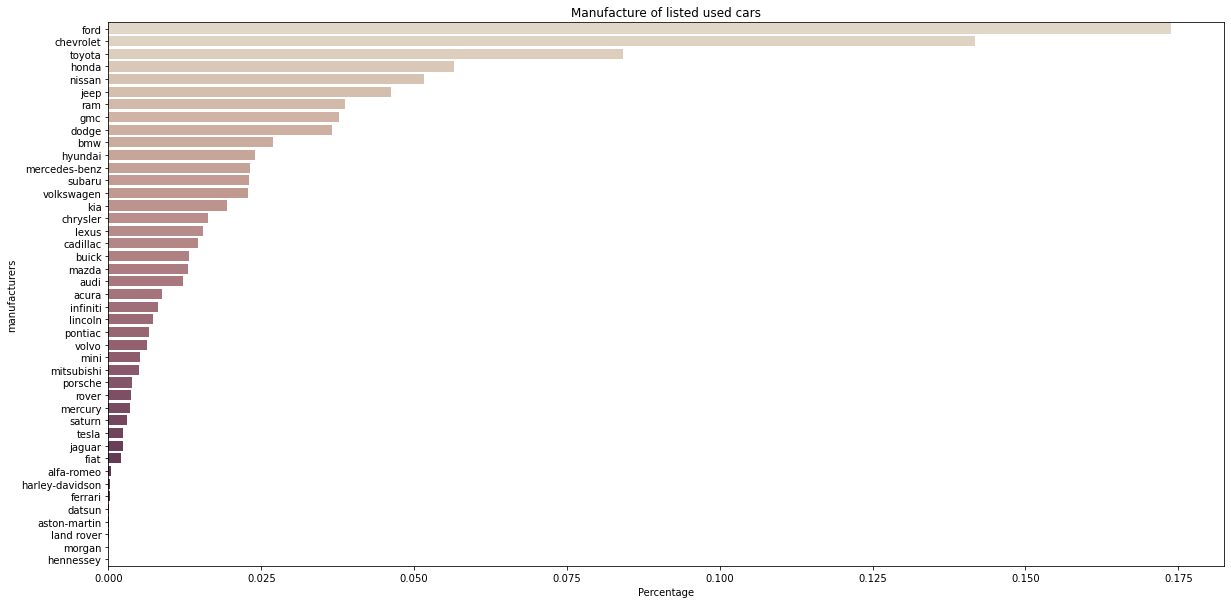

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#use the percentage
#since this is a very large dataset
manufacturers = car["manufacturer"].value_counts()/(len(car))

plt.figure(figsize=(20,10))
sns.barplot(y=manufacturers.index, x=manufacturers.values,palette="ch:.25")
plt.title("Manufacture of listed used cars")
plt.ylabel("manufacturers")
plt.xlabel("Percentage")
plt.show()


We have a lot of japanese made vehicles.

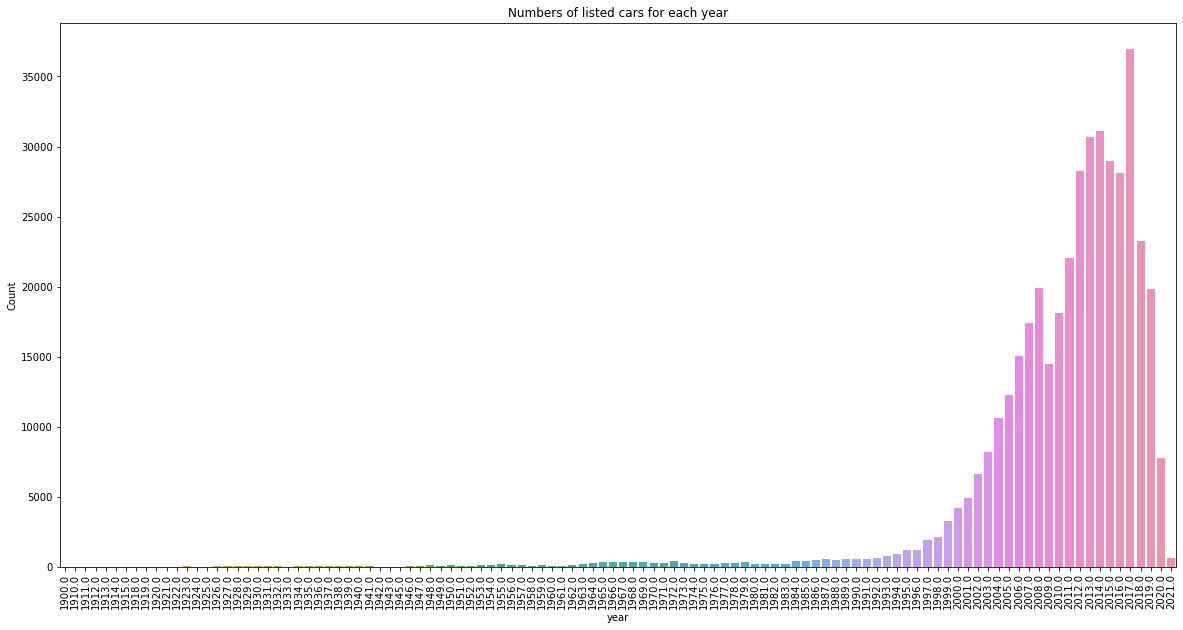

In [20]:
#group by year and count the number of price entries
tmp1 = car.groupby(by = "year")["price"].count()

plt.figure(figsize=(20,10))
sns.barplot(tmp1.index, tmp1.values)
plt.title("Numbers of listed cars for each year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


We can see a trend that there. Notice that this dataset contains data all the way back to the early 20th century. We can observe an increasing trend from around 1980 to 2007. And it looks like the economic crisis in 2008 brings some shockwave toward the second-handed vehicles markets. And it starts going up and down from 2009 to 2016 until Trump becomes president in 2017.

Let's move on to our problem:  how is the price of the used cars related to the odometer, drive, vehicle type, and colors.

### Distribution of Drive

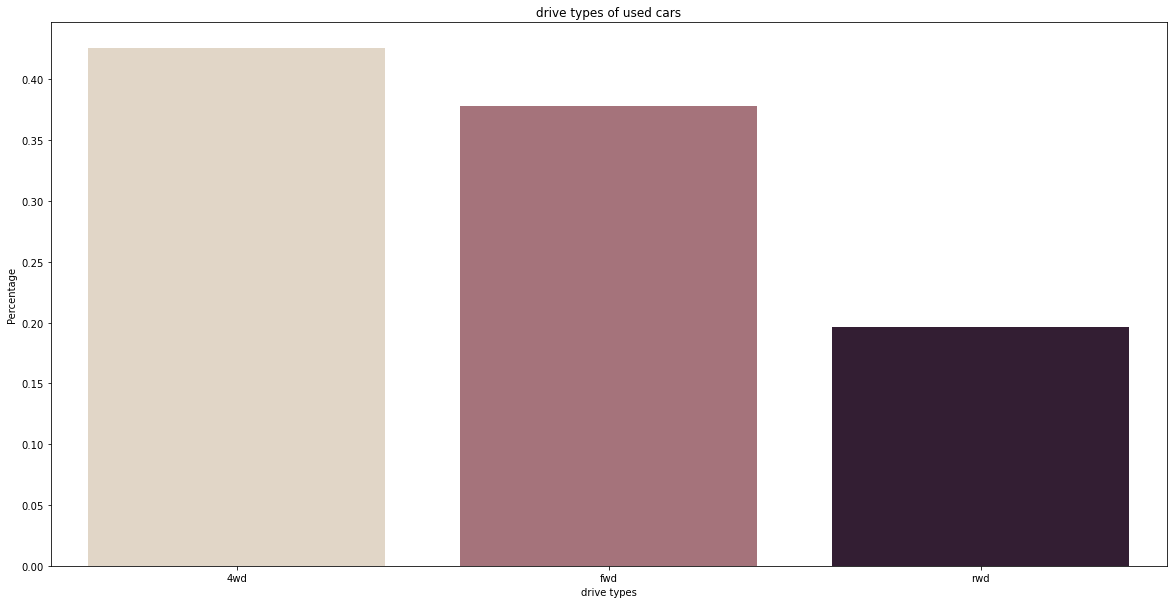

In [12]:
#look at the percentage
drive = car["drive"].value_counts()/(len(car))

plt.figure(figsize=(20,10))
sns.barplot(x=drive.index, y=drive.values,palette="ch:.25")
plt.title("drive types of used cars")
plt.ylabel("Percentage")
plt.xlabel("drive types")
plt.show()


4 wheel drive and front wheel drive both occupy 40% of the used-car market while rear wheel drive have about 20%.

### Distribution of vehicles type

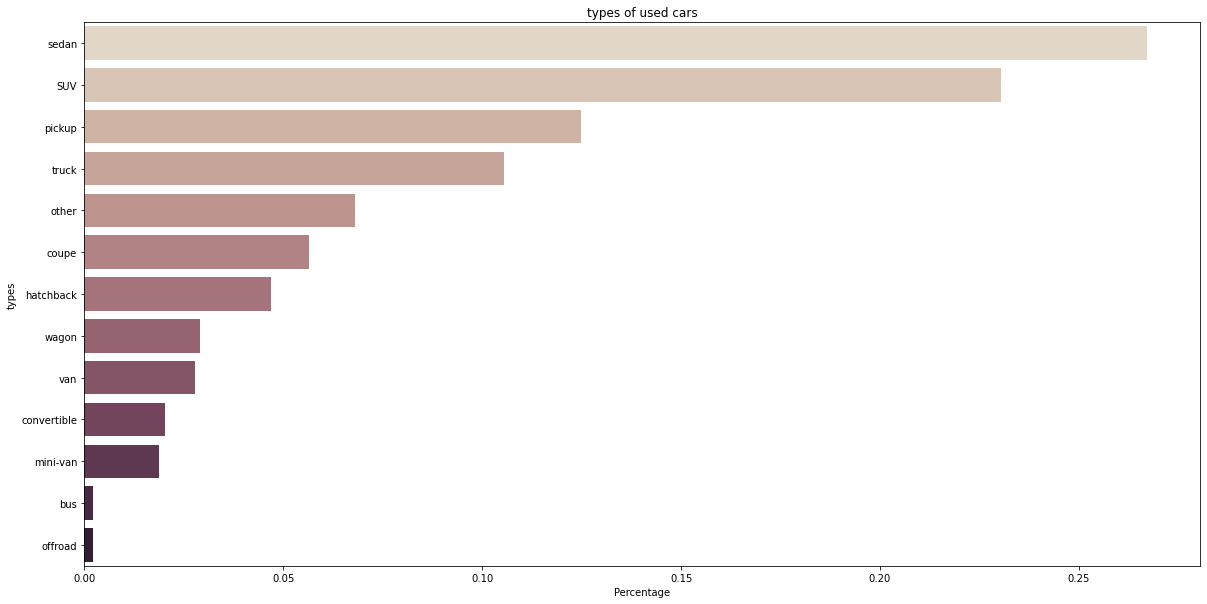

In [13]:
#look at the percentage
types = car["type"].value_counts()/(len(car))

plt.figure(figsize=(20,10))
sns.barplot(y=types.index, x=types.values,palette="ch:.25")
plt.title("types of used cars")
plt.ylabel("types")
plt.xlabel("Percentage")
plt.show()



The top 3 most popular cars are basically the most common ones in our lives: sedan, SUV, and pickup.

### Distribution of used cars colors

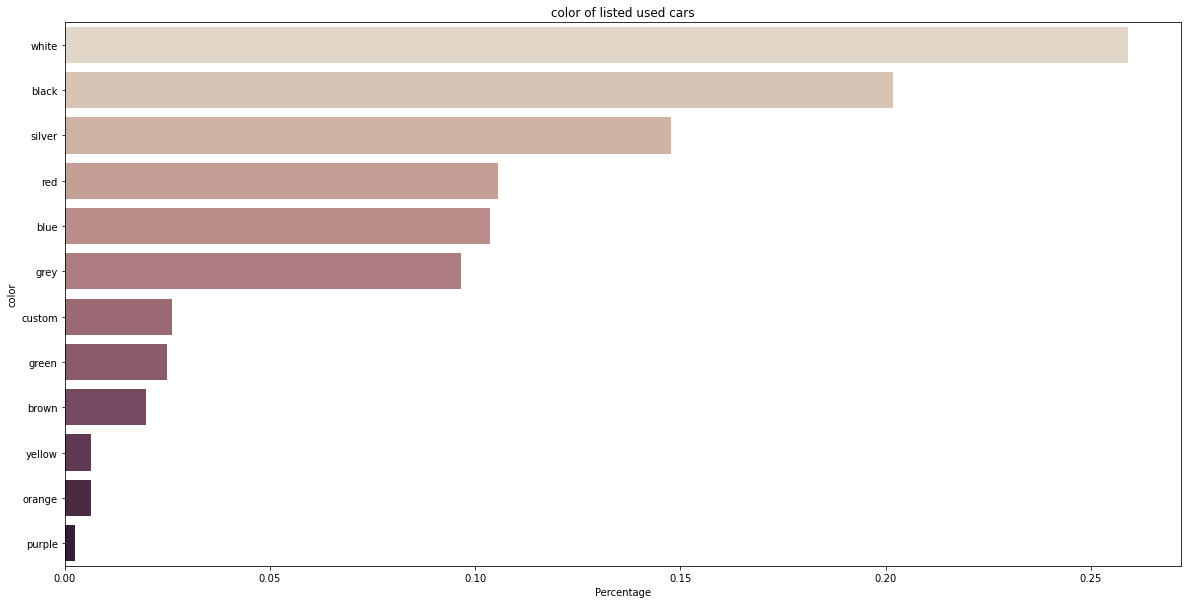

In [14]:
#look at the percentage
colors = car["paint_color"].value_counts()/(len(car))

plt.figure(figsize=(20,10))
sns.barplot(y=colors.index, x=colors.values,palette="ch:.25")
plt.title("color of listed used cars")
plt.ylabel("color")
plt.xlabel("Percentage")
plt.show()

No shocking patterns here, the most common colors of the listed used cars are white, black, and silver while the only popular bright color is red.

After looking at the distribution of a single variable, let's look at the plot of them VS price.

### Odometer VS price

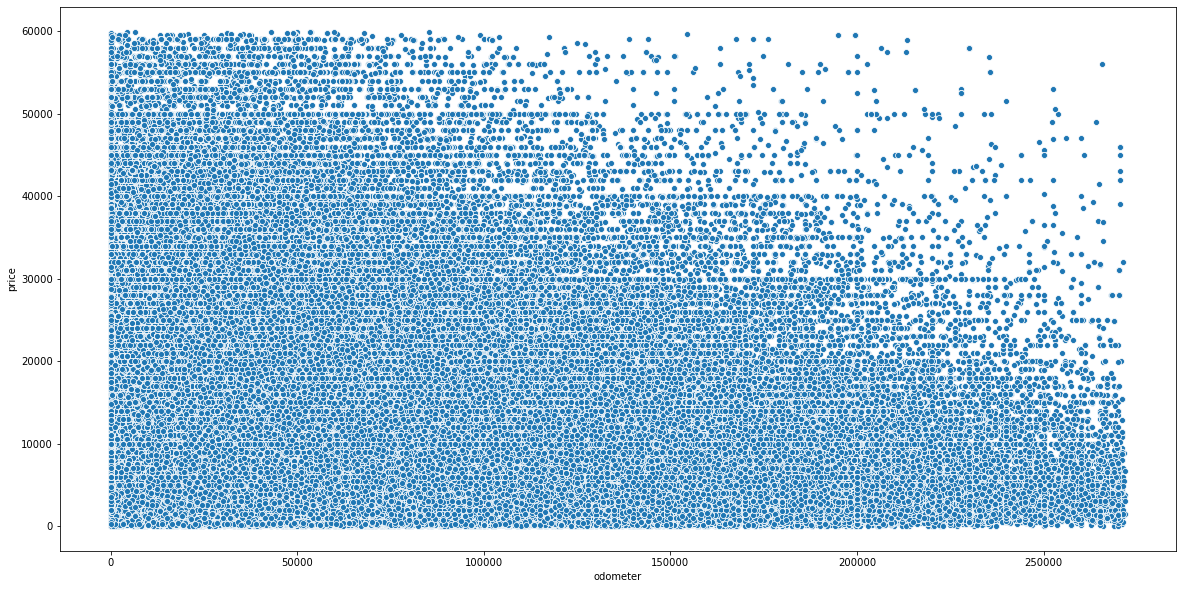

In [21]:
plt.figure(figsize=(20,10))
#apply a scatterplot
sns.scatterplot(x = 'odometer', y = 'price', data = car)
plt.show()

Sincere Apology if you find the image above to be disgusting and uncomfortable.

The plot just demonstrates the size of our dataset and the relation between odometer and price. There is no pattern that is obvious to me and I will say that they look random. Nevertheless, we will still train a regression model of odometer and price later.

### Drive Type VS Price

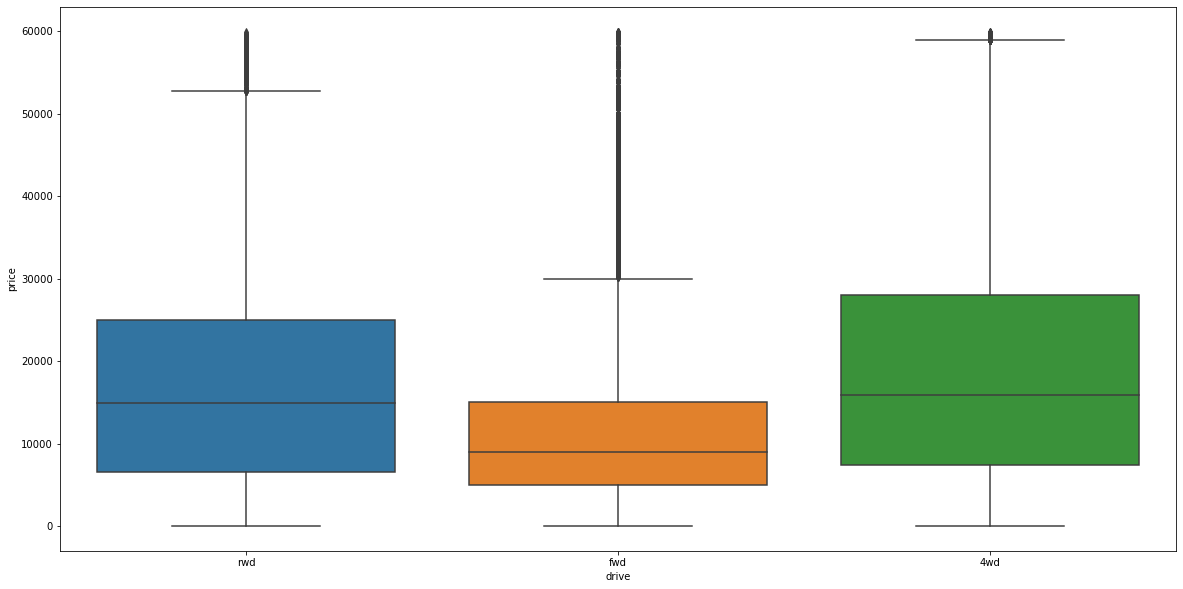

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(x="drive", y="price",data=car)
plt.show()

The price distribution of 4 wheel drive and rear wheel drive looks very similar to each other. Let's look at a violin plot.

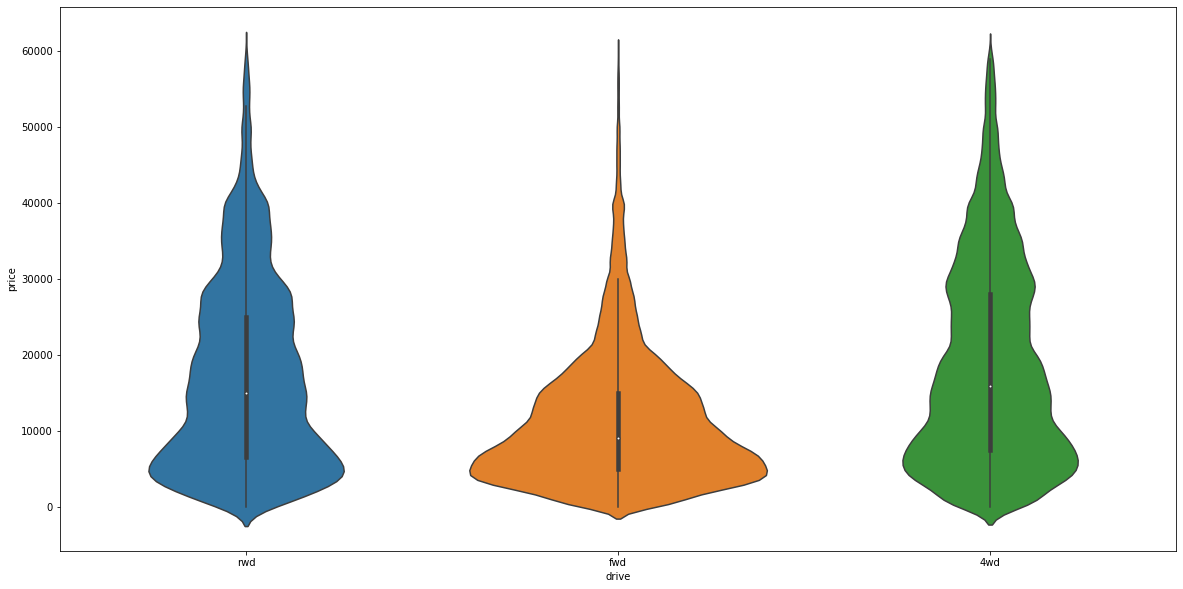

In [23]:
plt.figure(figsize=(20,10))
sns.violinplot(x="drive", y="price",data=car)
plt.show()

Rear-wheel drive and 4 wheel drive are very close to each other so we will conduct a Chi-Square Goodness Fit Test on whether the price differ by the drive types at level 0.05.

Null Hypothesis: The price is independent from the drive types: p_rwd = p_fwd = p_4wd = mean price of all used cars

Alternative Hypothesis: Null Hypothesis is false


In [24]:
#calculate mean price of all used cars
mean_price = car['price'].mean()

#mean price for specific drive type
p_rwd = car[car['drive'] == 'rwd']['price'].mean()
p_fwd = car[car['drive'] == 'fwd']['price'].mean()
p_4wd = car[car['drive'] == '4wd']['price'].mean()

In [25]:
import scipy.stats as stats

#our expected price
expected = [mean_price,mean_price,mean_price]

#the actual listing price
observed = [p_rwd,p_fwd,p_4wd]

#test stat
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=1897.1745905719931, pvalue=0.0)

Since p-value is 0, we have sufficient evidence to suggest that price of used cars differ by the drive types at level 0.05.

### Vehicle Types VS Price

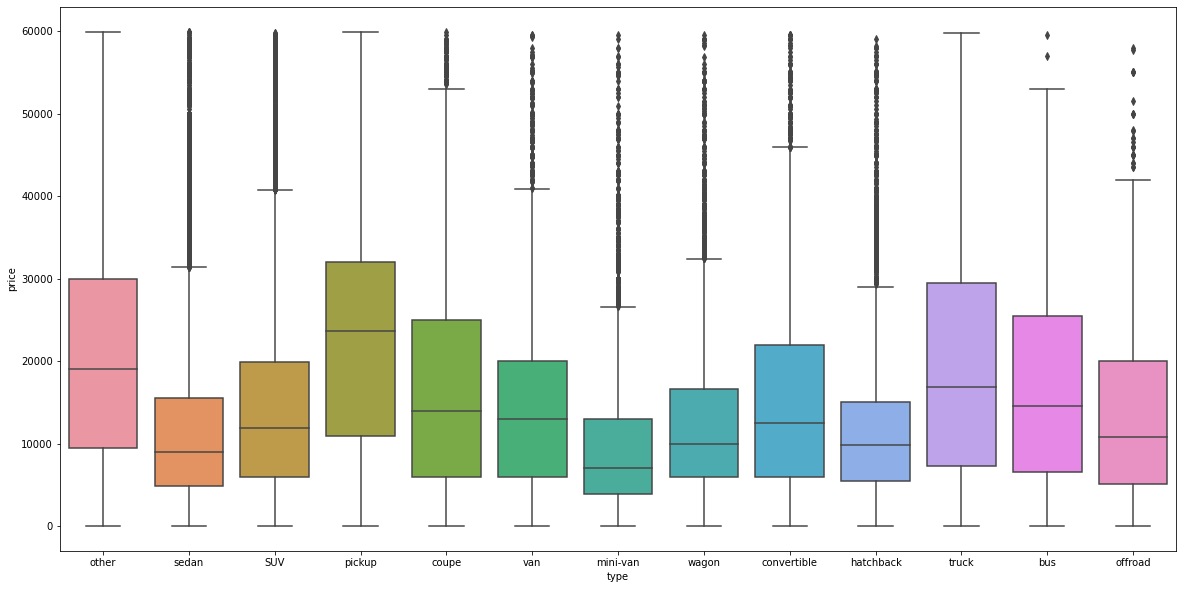

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(x="type", y="price",data = car);
plt.show()

It seems that the car type decides the price of used cars. But let's be more careful and conduct a hypothesis test at level 0.05. Our null hypothesis will be the price of all vehicle types are the same while the alternative hypothesis is the opposite.

In [27]:
car_list = ['other','sedan','SUV','pickup','coupe','van','mini-van','wagon','convertible','hatchback','truck','bus','offroad']

#observed listing price for different types of used cars
observed_type = []
expected_type = []

#loop through different types of vehicle
#find the corresponding mean price for that class
#store them into observed
for i in car_list:
    observed_type.append(car[car['type'] == i]['price'].mean())
    expected_type.append(car['price'].mean())
    
#test stat
stats.chisquare(f_obs=observed_type, f_exp=expected_type)

Power_divergenceResult(statistic=11477.708933731034, pvalue=0.0)

p-value = 0 suggests that the price is related to the vehicle types.

### Paint color VS price

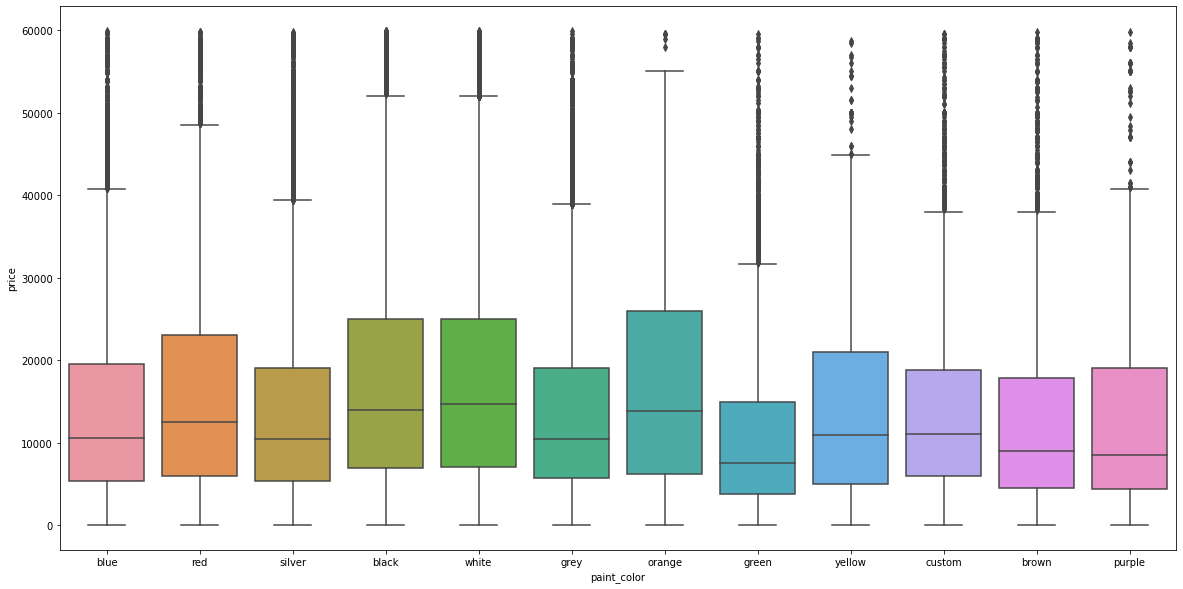

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x="paint_color", y="price",data = car);
plt.show()

It seems like that mean price for different color of the vehicles vary. Let's conduct a Goodness fit test at level 0.05. Null hypothesis is that the prices are the same for different colors of vehicles.

In [29]:
color_list = ['blue','red','silver','black','white','grey','orange','green','yellow','custom','brown','purple']

#observed mean listing price for different colors of used cars
observed_color = []
expected_color = []

#loop through different colors of vehicle
#find the corresponding mean price for that class
#store them into observed
for i in color_list:
    observed_color.append(car[car['paint_color'] == i]['price'].mean())
    expected_color.append(car['price'].mean())
stats.chisquare(f_obs=observed_color, f_exp=expected_color)

Power_divergenceResult(statistic=3041.5201005091776, pvalue=0.0)

The p-value is 0. There is sufficient evidence to suggest that the color somehow decides the price.

## Prediction

Let's train some model to predict the price.

### Odometer VS Price

Let's train a single linear regression model to predict the price via odometer. 

In [30]:
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
X = car.odometer.values.reshape(-1,1)
Y = car.price.values.reshape(-1,1)

#split our dataset using test set size = 0.25
#we want to inference about the price
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

#model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

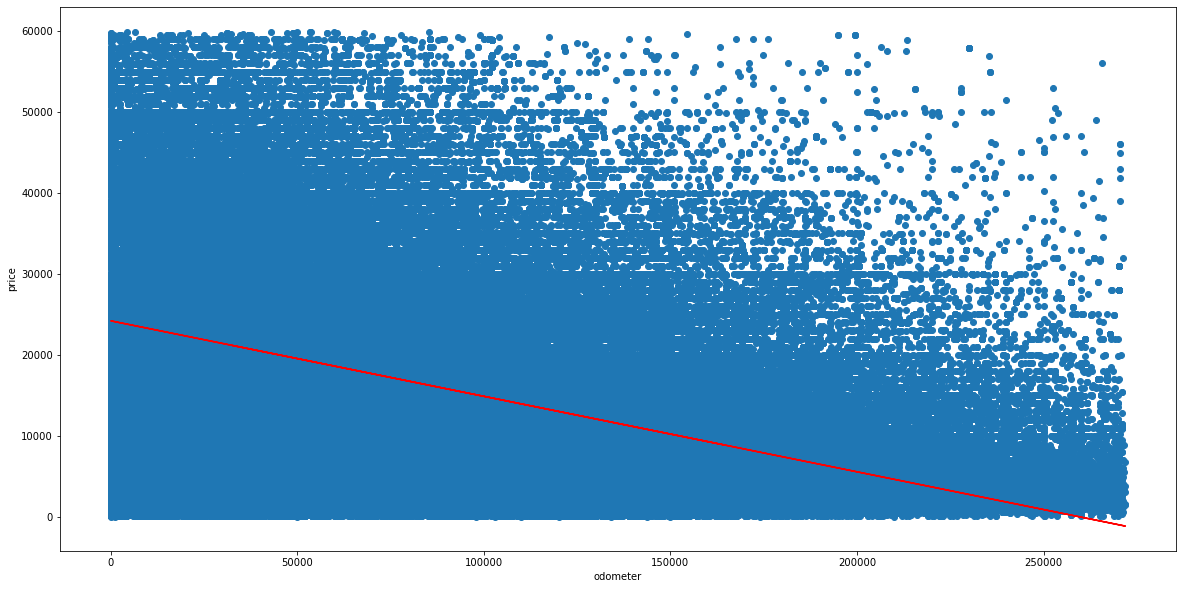

In [32]:
plt.figure(figsize=(20,10))
predict_X = lin_reg.predict(X)
plt.scatter(X,Y)
plt.plot(X,predict_X,color="red")
plt.ylabel("price")
plt.xlabel("odometer")
plt.show()

Looks very horrible and bad, how about the "accuracy"?

In [33]:
print("Mean squared error: %.2f" % np.mean((lin_reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f' % lin_reg.score(X_test, y_test))

Mean squared error: 112188094.30
Coefficient of determination: 0.21


Our model performs very badly. You can clearly see that from the graph. In addition, our coefficient of determination is only 0.22, which means that 22% of the data (odometer VS price) can be explained by this linear relationship. Since the data points are all over the place, there are no good models that can be used to predict price via odometer. That is, a model that's neither overfitting nor underfitting will still have poor performance. We can conclude that there is no relationship between odometer and price.

How about Types, Drives, Color VS Price

### Multiple Regression(Types, Drives, Color VS Price)

Since we are training a multiple regression model, we need to convert the categorical variabls into numerical. Let's start by checking our data for null values again

In [34]:
car.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,posting_date
0,7240372487,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,other,NaN,2020-12-02T08:11:30-0600
1,7240309422,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,NaN,2020-12-02T02:11:50-0600
2,7240224296,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,fwd,SUV,blue,2020-12-01T19:50:41-0600
3,7240103965,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,rwd,pickup,blue,2020-12-01T15:54:45-0600
4,7239983776,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,4wd,pickup,blue,2020-12-01T12:53:56-0600


According to the mean price, I sort the dictionaries of the mean price of drive types, vehicle types and colors calculated above in the hypothesis test in the following 3 code cells.

In [35]:
#dictionary contains the mean price for certain drive types
drive_dict = {"rwd":p_rwd,"fwd":p_fwd,"4wd":p_4wd}

#sort the dictionary according to values
sorted_drive_dict = dict(sorted(drive_dict.items(), key=lambda item: item[1]))
sorted_drive_dict

{'fwd': 11267.720818625563,
 'rwd': 17080.89912895844,
 '4wd': 18473.508354892187}

In [36]:
type_dict = {}

#loop through mean listing price for different types of vehicles
#past them into type_dict
for i in range(0,len(observed_type)):
    type_dict[car_list[i]]=observed_type[i]
sorted_type_dict = dict(sorted(type_dict.items(), key=lambda item: item[1]))
sorted_type_dict

{'mini-van': 9941.327355923819,
 'hatchback': 11427.491070532758,
 'sedan': 11486.659232652477,
 'wagon': 12266.473328446942,
 'SUV': 14321.693257934603,
 'offroad': 14331.417653390743,
 'van': 14631.112489082969,
 'convertible': 15446.380469023452,
 'coupe': 16934.247301815718,
 'bus': 17539.60024600246,
 'truck': 19467.318218984612,
 'other': 20345.860284605435,
 'pickup': 22867.036782970918}

In [37]:
#a dictionary contains the colors and their "values"
color_dict = {}

#loop through mean listing price for different color
#past them into color_dict
for i in range(0,len(observed_color)):
    color_dict[color_list[i]]=observed_color[i]

sorted_color_dict = dict(sorted(color_dict.items(), key=lambda item: item[1]))
sorted_color_dict

{'green': 11164.187148672223,
 'brown': 12651.607172743574,
 'purple': 13468.718691588785,
 'silver': 13769.62940384896,
 'custom': 13910.723192690137,
 'grey': 13916.531318626472,
 'blue': 14037.045573936684,
 'yellow': 14486.982355197544,
 'red': 15592.130298983771,
 'orange': 16624.02566066641,
 'black': 16823.17058090491,
 'white': 17251.434381128267}

After observing that all these mean prices range from 9900 to around 23000, in the following 3 code cells, I divide the mean price by 10000 in these sorted dictionaries so that we obtain dictionaries whose index are the categories (types, drive, colors) and the values are float which represent the sale price this category is expected to produce. In such a way, we convert the categorical variables into numerical and assign an ideal value to them. Thus, We can directly use these values for our multiple regression model.

In [38]:
drive_order = {}
for entry in sorted_drive_dict:
    drive_order[entry] = (sorted_drive_dict[entry])/10000
drive_order    

{'fwd': 1.1267720818625564,
 'rwd': 1.708089912895844,
 '4wd': 1.8473508354892187}

In [39]:
type_order = {}
for entry in sorted_type_dict:
    type_order[entry] = (sorted_type_dict[entry])/10000
type_order   

{'mini-van': 0.9941327355923819,
 'hatchback': 1.1427491070532758,
 'sedan': 1.1486659232652476,
 'wagon': 1.2266473328446943,
 'SUV': 1.4321693257934602,
 'offroad': 1.4331417653390743,
 'van': 1.463111248908297,
 'convertible': 1.5446380469023453,
 'coupe': 1.6934247301815717,
 'bus': 1.753960024600246,
 'truck': 1.9467318218984613,
 'other': 2.0345860284605433,
 'pickup': 2.2867036782970915}

In [40]:
color_order = {}
for entry in sorted_color_dict:
    color_order[entry] = (sorted_color_dict[entry])/10000
color_order

{'green': 1.1164187148672222,
 'brown': 1.2651607172743573,
 'purple': 1.3468718691588786,
 'silver': 1.376962940384896,
 'custom': 1.3910723192690138,
 'grey': 1.3916531318626473,
 'blue': 1.4037045573936684,
 'yellow': 1.4486982355197544,
 'red': 1.559213029898377,
 'orange': 1.662402566066641,
 'black': 1.682317058090491,
 'white': 1.7251434381128268}

In the next several 3 code cells, we formally replace the categorical columns in our car dataset with values from our dictionaries.

In [41]:
import category_encoders as ce

#replace catalog
cleanup_nums = {"drive":     {'fwd': 1.1107241725252732,'rwd': 1.6498551229979308,'4wd': 1.7426127021829427},
                "paint_color": {'green': 1.0931180311401305, 'purple': 1.17512375127421,'brown': 1.217375922933499,
                                'silver': 1.3325843821291192,'custom': 1.334293918981268,'grey': 1.3346726868966934,
                                'blue': 1.363800432920915,'yellow': 1.4106880126182966,'red': 1.508867072716262,
                                'black': 1.5989277464177158,'orange': 1.6087891594658288,'white': 1.6352575137020429},
                "type": {'mini-van': 0.9771950647043898,'sedan': 1.1219693597034721,'hatchback': 1.126191635697195,
                         'wagon': 1.2047218820014935,'offroad': 1.3753831838565023,'SUV': 1.3970415081841103,
                         'van': 1.4266493285263633,'convertible': 1.4757454654654656,'bus': 1.5964452316076294,
                         'coupe': 1.6134247830279653,'truck': 1.8108749580949848,'other': 1.9704960358249566,
                         'pickup': 2.1520367992803693}}

#replace original dataset with cleanup numbers
test_df = car.replace(cleanup_nums)
test_df.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,posting_date
0,7240372487,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,1.649855,1.970496,NaN,2020-12-02T08:11:30-0600
1,7240309422,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,1.110724,1.121969,NaN,2020-12-02T02:11:50-0600
2,7240224296,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,1.110724,1.397042,1.3638,2020-12-01T19:50:41-0600
3,7240103965,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,1.649855,2.152037,1.3638,2020-12-01T15:54:45-0600
4,7239983776,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,1.742613,2.152037,1.3638,2020-12-01T12:53:56-0600


You might notice that paint_color still contains some NaN, we replace them with 0 so that we don't need to consider the price associated with the entry of this color.

In [43]:
#fill NaN with 0
test_df['paint_color'] = test_df['paint_color'].fillna(0)
test_df.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,posting_date
0,7240372487,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,1.649855,1.970496,0.0000,2020-12-02T08:11:30-0600
1,7240309422,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,1.110724,1.121969,0.0000,2020-12-02T02:11:50-0600
2,7240224296,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,1.110724,1.397042,1.3638,2020-12-01T19:50:41-0600
3,7240103965,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,1.649855,2.152037,1.3638,2020-12-01T15:54:45-0600
4,7239983776,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,1.742613,2.152037,1.3638,2020-12-01T12:53:56-0600


Check if we have the same data size for "price", "drive", "type", "paint_color"

In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413974 entries, 0 to 458212
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            413974 non-null  int64  
 1   price         413974 non-null  int64  
 2   year          413087 non-null  float64
 3   manufacturer  399067 non-null  object 
 4   model         409861 non-null  object 
 5   condition     248118 non-null  object 
 6   cylinders     263756 non-null  object 
 7   fuel          411390 non-null  object 
 8   odometer      413974 non-null  float64
 9   transmission  412233 non-null  object 
 10  drive         413974 non-null  float64
 11  type          413974 non-null  float64
 12  paint_color   413972 non-null  float64
 13  posting_date  413952 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 67.4+ MB


They all have 413974. Our "odometer" also have the same number of entries.

In [44]:
#split our dataset using test set size = 0.25
#we want to inference about the price
X = test_df[['drive','type','paint_color']]
Y = test_df.price
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

In [45]:
print("Mean squared error: %.2f" % np.mean((lin_reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f' % lin_reg.score(X_test, y_test))

Mean squared error: 121229586.31
Coefficient of determination: 0.15


Coefficient of determination = 0.15 tells us that only 15% of the data can be explained by the model we trained. This is a very poor result.

### Odometer, drive, types, color VS price

How about we count "odometer" this time, let's see how's the model performing

In [48]:

#split our dataset using test set size = 0.25
#we want to inference about the price
#X = car.odometer.values.reshape(-1,1)
X = test_df[['odometer','drive','type','paint_color']]
#Y = car.price.values.reshape(-1,1)
Y = test_df.price
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

print("Mean squared error: %.2f" % np.mean((lin_reg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Coefficient of determination: %.2f' % lin_reg.score(X_test, y_test))

Mean squared error: 92970711.72
Coefficient of determination: 0.35


Our model becomes slightly better and is capable of explaining 35% of the data now. However, it is a still very poor model.

# Conclusion

In this notebook, we failed to demonstrate a multiple linear relationship between odometer, drive types, vehicle types, paint colors of vehicles, and the listing price of the vehicles yet we show that there is a relation between drive types, vehicle types,  paint colors and the listing price using hypothesis test at level 0.05 separately. There are many improvements we can apply to our models such as adjusting the power of some variables (eg maybe the listing price is related to the second-degree of the odometer instead of the first-degree ) or add some interaction terms (eg with the same amount of odometers, certain colors might make the cars looks more worn and will reduce its market price). In addition to changing approaches of implementing the model, I consider this dataset to be not a perfect dataset for predicting the price using the mentioned variables since this dataset is about the listing price of used cars. In other words, the listing price is mainly determined by the publishers, which are very subjective. And we can not tell which vehicles are sold in this dataset. Our model might perform better at a dataset that contains the same attributes yet with some vehicles are actually sold since we are able to tell what price the customers are willing to buy. We can predict the price better after understanding the "market demands".